In [3]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.src.common.enums.enum import (
    MapLayerType,
    ObjectSize,
    GateType,
    TemplateTypes,
    ObjectRotation,
    YamlReplacementKeywords,
    CheckPlacementReturnTypes,
)

from aoe2mapgenerator.src.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.src.common.constants.constants import (
    DEFAULT_EMPTY_VALUE,
    BASE_SCENE_DIR_LINUX,
    BASE_SCENARIO_NAME,
    TEMPLATE_DIR_LINUX,
)
from aoe2mapgenerator.src.common.constants.default_objects import (
    GHOST_OBJECT_DISPLACEMENT,
    DEFAULT_EMPTY_OBJECT,
)
from aoe2mapgenerator.src.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.src.map.map import Map
import os
from aoe2mapgenerator.src.serializer.serializer import (
    _convert_map_value_to_string,
    _get_enum_list,
    _recursive_parse_enum_to_string,
    serialize_map,
    get_all_functions_and_arguments,
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string,
)
from aoe2mapgenerator.src.triggers.triggers import TriggerManager
from aoe2mapgenerator.src.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.src.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.src.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.src.units.placers.group_placer import GroupPlacerManager
from src.units.placers.point_management.point_manager import PointCollection
from aoe2mapgenerator.src.testing import awesome_function
from aoe2mapgenerator.src.map.map_object import MapObject
from src.units.placers.point_management.point_selector import PointSelector
from aoe2mapgenerator.src.visualizer.visualizer import Visualizer
from aoe2mapgenerator.src.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.src.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.src.map.map_manager import MapManager
from aoe2mapgenerator.src.units.placers.placer_configs import *
from aoe2mapgenerator.src.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json

In [11]:
map_manager = MapManager(100)
# This setup is kinda ugly for the point
# point_selector = PointSelector(map_manager.get_map())

In [12]:
points = map_manager.point_selector.get_points_in_range(
    PointSelectorInRangeConfig(
        map_layer_type=MapLayerType.UNIT,
        object_type=DEFAULT_EMPTY_OBJECT,
        min_range=5,
        max_range=20,
        points_to_be_in_range_of=[(50, 50)],
    )
)

In [13]:
map_manager.point_manager.add_points(points)

In [14]:
for point in points:

    map_manager.base_placer.place_single(
        map_manager.point_manager,
        map_layer_type=MapLayerType.UNIT,
        point=point,
        obj_type=UnitInfo.AMAZON_ARCHER,
        player_id=PlayerId.ONE,
    )

In [15]:
# map_manager.place_borders(AddBordersConfig(
#     point_manager=map_manager.point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     obj_type=UnitInfo.LEGIONARY,
#     player_id=PlayerId.ONE,
#     margin=1
# ))

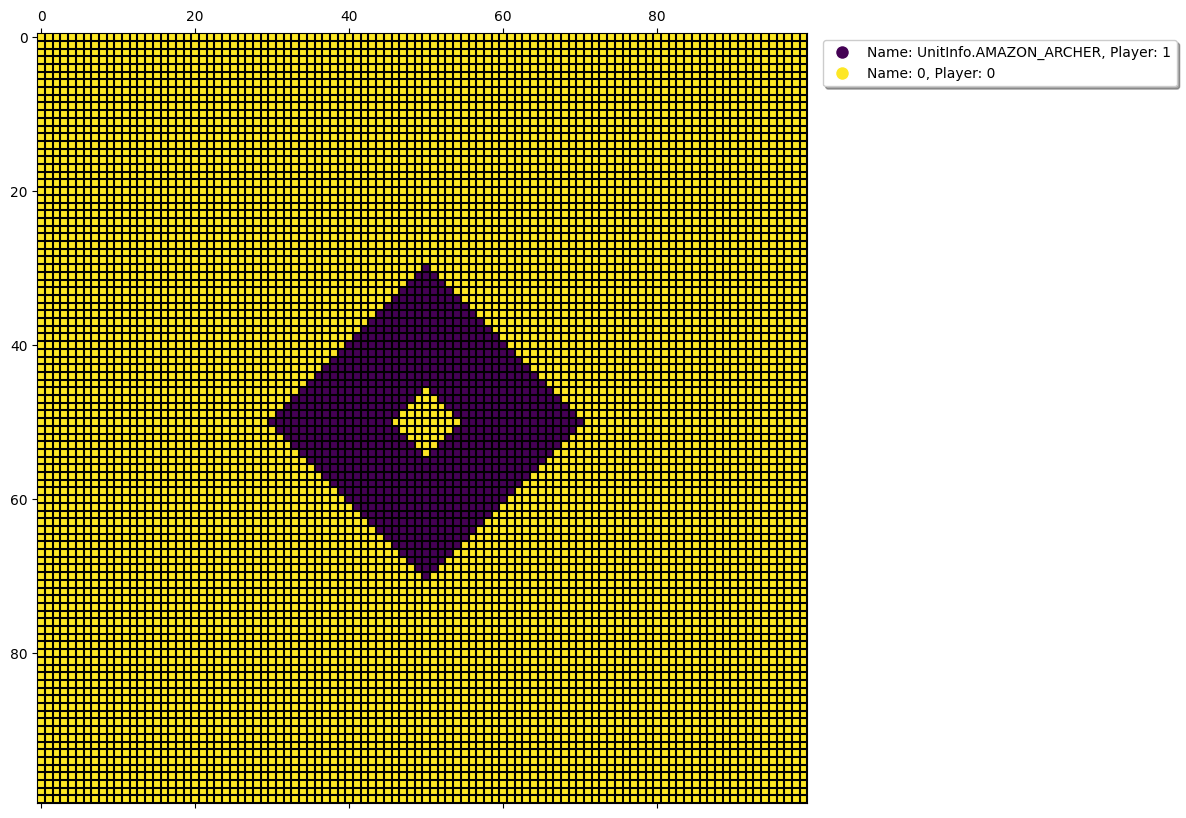

In [16]:
map_manager.visualize_map(
    VisualizeMapConfig(map_layer_type=MapLayerType.UNIT, fig_size=(10, 10))
)